In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler

1/ Load and explore the training and test dataset, do necessary pre-processing

a/ Show both training and test dataset size

In [4]:
# Load datasets
train_df = pd.read_csv('cirrhosis_train.csv')
test_df = pd.read_csv('crrrhosis_test.csv')

print("Training Data Size:", train_df.shape)
print("Test Data Size:", test_df.shape)

Training Data Size: (224, 20)
Test Data Size: (88, 20)


b/ Show the feature types, and indicate which feature has missing values.

In [6]:
print("Training data: ")
print(train_df.info())
print("Test data: ")
print(test_df.info())

Training data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   trainID        224 non-null    int64  
 1   N_Days         224 non-null    int64  
 2   Status         224 non-null    object 
 3   Drug           224 non-null    object 
 4   Age            224 non-null    int64  
 5   Sex            224 non-null    object 
 6   Ascites        224 non-null    object 
 7   Hepatomegaly   224 non-null    object 
 8   Spiders        224 non-null    object 
 9   Edema          224 non-null    object 
 10  Bilirubin      224 non-null    float64
 11  Cholesterol    201 non-null    float64
 12  Albumin        224 non-null    float64
 13  Copper         222 non-null    float64
 14  Alk_Phos       224 non-null    float64
 15  SGOT           224 non-null    float64
 16  Tryglicerides  200 non-null    float64
 17  Platelets      221 non-null    float64

c/ Use an appropriate method to deal with the missing values for both the training and test set.

In [8]:
# Fill missing values in the training dataset
train_df['Cholesterol'].fillna(train_df['Cholesterol'].median(), inplace=True)
train_df['Copper'].fillna(train_df['Copper'].median(), inplace=True)
train_df['Tryglicerides'].fillna(train_df['Tryglicerides'].median(), inplace=True)
train_df['Platelets'].fillna(train_df['Platelets'].median(), inplace=True)

# Fill missing values in the test dataset
test_df['Cholesterol'].fillna(test_df['Cholesterol'].median(), inplace=True)
test_df['Tryglicerides'].fillna(test_df['Tryglicerides'].median(), inplace=True)
test_df['Platelets'].fillna(test_df['Platelets'].median(), inplace=True)

d/ Encoding for the categorical features.

In [13]:
# Encode 'Status' column in train_df
status_mapping = {'D': 0, 'C': 1, 'CL': 2}
train_df['Status'] = train_df['Status'].map(status_mapping)

# Encode other categorical features using LabelEncoder
cat_cols = train_df.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in cat_cols:
    train_df[col] = encoder.fit_transform(train_df[col])
    test_df[col] = encoder.transform(test_df[col])

e/ Show the label distribution based on the training data

In [17]:
# Show the label distribution
label_distribution = train_df['Status'].value_counts()
print("Label Distribution:\n", label_distribution)

Label Distribution:
 Status
1    119
0     93
2     12
Name: count, dtype: int64


As the distribution above, class C has too much data, while class CL has only 12. It indicated that the training dataset is imbalance. 

2/ Based on the pre-processed training data from question 1, create three supervised machine learning (ML) models for predicting “Status”

a/ and b/ Choose three supervised models and use an appropriate validation method, report performance score using a suitable metric

In [22]:
# Keep ID for train and test data
train_ids = train_df['trainID']
test_ids = test_df['testID']

X = train_df.drop(columns=['Status', 'trainID','N_Days'])
y = train_df['Status']

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(X)

 # Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on training set
    y_train_pred = model.predict(X_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics for training set
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred, average='weighted')
    train_recall = recall_score(y_train, y_train_pred, average='weighted')
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    
    # Calculate metrics for validation set
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Training Accuracy: {train_accuracy:.2f}")
    print(f"Training Precision: {train_precision:.2f}")
    print(f"Training Recall: {train_recall:.2f}")
    print(f"Training F1 Score: {train_f1:.2f}")
    print(f"Validation Accuracy: {val_accuracy:.2f}")
    print(f"Validation Precision: {val_precision:.2f}")
    print(f"Validation Recall: {val_recall:.2f}")
    print(f"Validation F1 Score: {val_f1:.2f}")
    print("\n")


In [26]:
# Support vector machine
svm_model = SVC()
evaluate_model(svm_model, X_train, y_train, X_val, y_val)

# Random forest
rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, y_train, X_val, y_val)

# Decision tree
dt_model = DecisionTreeClassifier()
evaluate_model(dt_model, X_train, y_train, X_val, y_val)

Model: SVC
Training Accuracy: 0.84
Training Precision: 0.85
Training Recall: 0.84
Training F1 Score: 0.82
Validation Accuracy: 0.84
Validation Precision: 0.83
Validation Recall: 0.84
Validation F1 Score: 0.83


Model: RandomForestClassifier
Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1 Score: 1.00
Validation Accuracy: 0.82
Validation Precision: 0.80
Validation Recall: 0.82
Validation F1 Score: 0.81


Model: DecisionTreeClassifier
Training Accuracy: 1.00
Training Precision: 1.00
Training Recall: 1.00
Training F1 Score: 1.00
Validation Accuracy: 0.69
Validation Precision: 0.72
Validation Recall: 0.69
Validation F1 Score: 0.70




/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Due to the need to classify patients surviving cirrhosis, it is a classification problem. I use three algorithms: Support Vector Machine, Decision Tree, and Random Forest. The accuracy index does not differ much in both training and validation. It suggests that these models are likely well-fitted but could potentially overfit. 

c/, d/ and e/ Find optimised for hyper-parameters for each ML model and handle label imbalance

As the results above, the model can be overfitting. To find the best hyper-parameters for each ML model, I will the the Grid Search cv method. Firstly, I will define a function to find the best hyper parameter. Then, it returns three best parameters for each ML model. The model with the highest accuracy will be selected to predict the test set.  
For the label imbalance problem, I apply RandomOverSampler method. It can balance the datasets by replicating the minority class. 

In [31]:
# Apply ROS
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split training data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [33]:
# Define param_grid for each ML model
# Hyperparameters for SVM
svm_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Hyperparameters for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [35]:
# Function Grid Search and evaluate
def perform_grid_search(model, param_grid, X_train, y_train, X_val, y_val):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1) 
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    # Predict
    y_val_pred = best_model.predict(X_val)
    
    # Calculate metrics
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_precision = precision_score(y_val, y_val_pred, average='weighted')
    val_recall = recall_score(y_val, y_val_pred, average='weighted')
    val_f1 = f1_score(y_val, y_val_pred, average='weighted')
    
    print(f"Best Parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Validation Precision: {val_precision:.4f}")
    print(f"Validation Recall: {val_recall:.4f}")
    print(f"Validation F1 Score: {val_f1:.4f}")
    print("\n")
    
    return best_model

In [37]:
# SVM
svm_model = SVC()
best_svm = perform_grid_search(svm_model, svm_param_grid, X_train, y_train, X_val, y_val)

# Random Forest
rf_model = RandomForestClassifier()
best_rf = perform_grid_search(rf_model, rf_param_grid, X_train, y_train, X_val, y_val)

# Decision Tree
dt_model = DecisionTreeClassifier()
best_dt = perform_grid_search(dt_model, dt_param_grid, X_train, y_train, X_val, y_val)

Best Parameters for SVC: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Validation Accuracy: 0.7778
Validation Precision: 0.7745
Validation Recall: 0.7778
Validation F1 Score: 0.7690




/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Best Parameters for RandomForestClassifier: {'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Validation Accuracy: 0.8472
Validation Precision: 0.8481
Validation Recall: 0.8472
Validation F1 Score: 0.8475


Best Parameters for DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Validation Accuracy: 0.8056
Validation Precision: 0.8064
Validation Recall: 0.8056
Validation F1 Score: 0.7963




As the result above, the Random Forest has the highest accuracy, so it will be used to classify the test set. 

3/ Predict test set

In [41]:
# Predict on test set (process as the same training set)
X_test = test_df.drop(columns=['Status', 'testID', 'N_Days'])
X_test = scaler.fit_transform(X_test)
y_test_pred = best_rf.predict(X_test)

# Create a dataframe
test_predictions = pd.DataFrame({
    'testID': test_ids,  
    'Status': y_test_pred
})
# Create mapping dictionary
status_mapping = {0: 'D', 1: 'C', 2: 'CL'}

# Apply mapping for status
test_predictions['Status'] = test_predictions['Status'].map(status_mapping)

# Save results to file CSV
test_predictions.to_csv('results.csv', index=False)

4/ Analyse the importance of the features for predicting “Status” using two different approaches. Give statistical reasons of your findings.

To identify the importance of features, I apply Random Forest and Decision Tree. For Decision Tree, at each node of it, the feature with the highest score is chosen as the splitting criterion. The significance of each feature can be determined by considering how much it contributes. Random Forest measures the reduction in impurity of each feature. The feature with a higher value is more important in predicting the outcome.

a/ Apply Random Forest Feature Importance

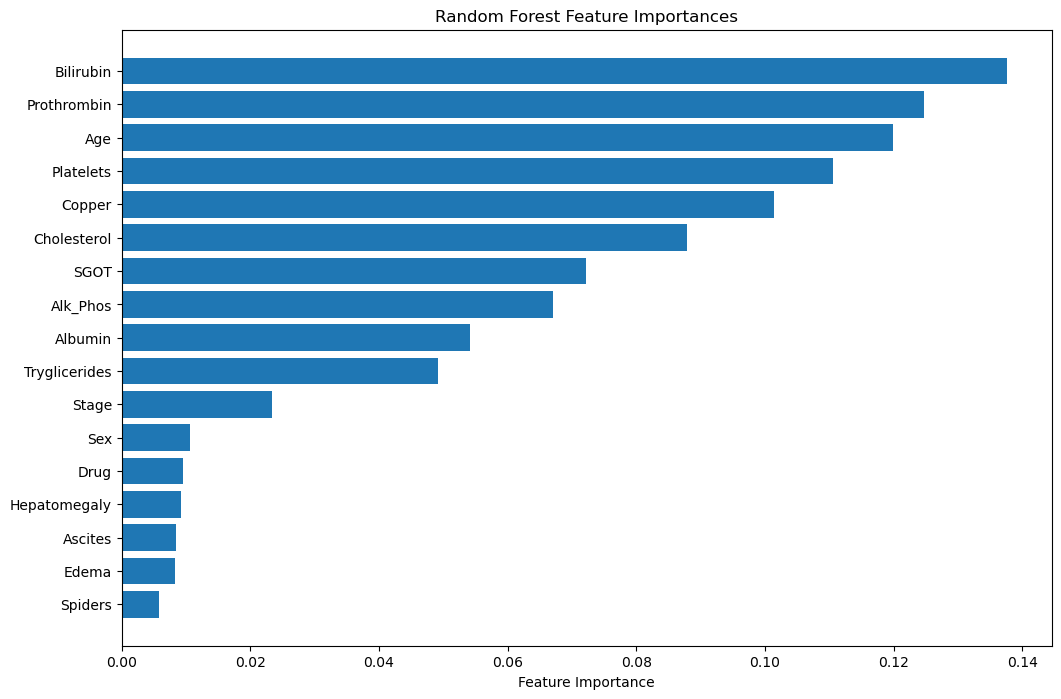

In [90]:
X = train_df.drop(columns=['Status', 'trainID','N_Days'])

# Assign features name
feature_names = X.columns

# Train the Random Forest model
rf_model = RandomForestClassifier(max_depth=20, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=200)
rf_model.fit(X_train, y_train)

# Assign feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importances')
plt.gca().invert_yaxis()
plt.show()

b/ Apply decision tree to find feature importance

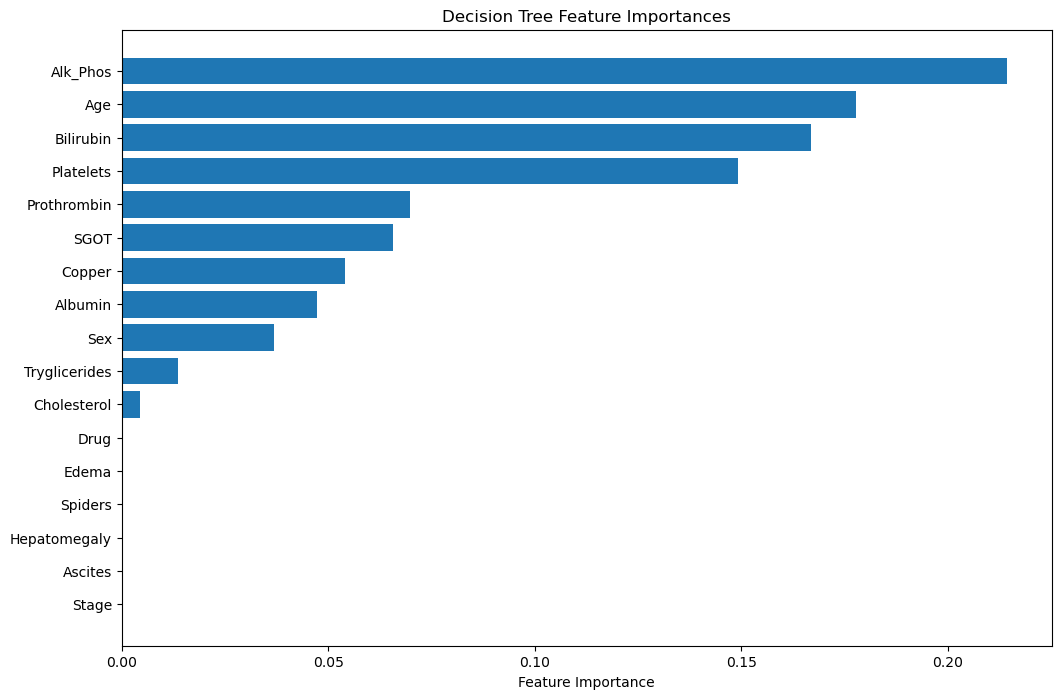

In [93]:
# Train the Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=2, min_samples_split=2, criterion='entropy')
dt_model.fit(X_train, y_train)

# Assign feature importances
importances = dt_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Decision Tree Feature Importances')
plt.gca().invert_yaxis()
plt.show()

The most five importance of feature in Random Forest are Bilirubin, Prothrombin, Age, Platelets, and  Copper. Meanwhile, in Decision Tree, they are Alk_Phos, Age, Bilirubin, Platelets, and Prothrombin. 